**2.1 Building the circuit to prepare the Bell state**

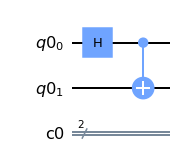

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

# initially by default, qubits are set to 0
# Applying Hadamard to first qubitbit
qc.h(q[0])
# Applying CNOT gate where first qubit is control bit, and second qubit is target bit
qc.cx(q[0], q[1])

qc.draw(output='mpl')

In [2]:
# Verifying that bell state has been obtained
qc.measure(q,c)
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)
print(counts)

{'00': 511, '11': 489}


**2.2  Adding Error Gate with probability p=0.4, in this case we consider the error gate as X-gate, causing the bit flip error**

In [3]:
from random import randrange
# function to introduce error with a probability p
def chance(prob):
    '''
    params:
        prob(float): value of probability
        
    returns:
        cause(bool): 1 or 0
    '''
    limiting_number = int(100 * prob )
    random_number = randrange(100)
    return random_number < limiting_number
    

X Error gate acts on 1 qubit


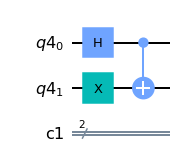

In [4]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

qc.h(q[0])

# Applying error gate to individual bits
# here for each bit
# -probability of  X-gate acting on it is 0.2 = (0.4 * 0.5)
# -probability of Z-gate acting on it is 0.2 = (0.4 * 0.5)
for i in [0,1]:
    if chance(0.4):
        if randrange(2) == 0:
            qc.x(q[i])
            print('X Error gate acts on {} qubit'.format(i))
        else:
            qc.z(q[i])
            print('Z Error gate acts on {} qubit'.format(i))



qc.cx(q[0], q[1])

qc.draw(output='mpl')

In [5]:
# CASES TO BE ADDED IN THIS IMAGE
qc.measure(q,c)
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)
print(counts)

{'01': 494, '10': 506}


In [11]:
# Counting if we get answers as per theoretical calculation or NOT
n1 = 0 # Number of times we obtain |00> +/- |11>/root(2), theoretical expectations = 80 times out of 100
n2 = 0 # Number of times we obtain |01> +/- |10>/root(2), theoretical expectations = 20 times out of 100
for r in range(100):
    print('{} iteration'.format(r))
    q = QuantumRegister(2)
    c = ClassicalRegister(2)
    qc = QuantumCircuit(q,c)
    qc.h(q[0])
    for i in [0,1]:
        if chance(0.4):
            if randrange(2) == 0:
                qc.x(q[i])
                print('X Error gate acts on {} qubit'.format(i))
            else:
                qc.z(q[i])
                print('Z Error gate acts on {} qubit'.format(i))
    qc.cx(q[0], q[1])
    qc.measure(q,c)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
    counts = job.result().get_counts(qc)
    print(counts.get('00') )
    if counts.get('00') != None:
        n1 += 1
    else:
        n2 += 1

print('Number of times |00> +/- |11>/root(2) ', n1)
print('Number of times |01> +/- |10>/root(2) ', n2)
# We see the around 20 % of the times we get |01> +/- |10>/root(2), which is caused by error gates. Now this error correction needs to be done. Also we need to keep
# in mind that there there was also a change in output in case of |00> - |11>/ root(2), but  measurements using expectation values cannot differentiate it.
# In the next section we apply the signflip and bitflip correct the error

0 iteration
503
1 iteration
Z Error gate acts on 1 qubit
487
2 iteration
X Error gate acts on 1 qubit
None
3 iteration
500
4 iteration
469
5 iteration
497
6 iteration
Z Error gate acts on 0 qubit
Z Error gate acts on 1 qubit
512
7 iteration
X Error gate acts on 0 qubit
512
8 iteration
505
9 iteration
X Error gate acts on 0 qubit
518
10 iteration
520
11 iteration
Z Error gate acts on 0 qubit
X Error gate acts on 1 qubit
None
12 iteration
483
13 iteration
X Error gate acts on 0 qubit
478
14 iteration
501
15 iteration
X Error gate acts on 1 qubit
None
16 iteration
X Error gate acts on 0 qubit
516
17 iteration
X Error gate acts on 1 qubit
None
18 iteration
484
19 iteration
503
20 iteration
485
21 iteration
Z Error gate acts on 0 qubit
506
22 iteration
X Error gate acts on 1 qubit
None
23 iteration
508
24 iteration
Z Error gate acts on 0 qubit
504
25 iteration
X Error gate acts on 0 qubit
513
26 iteration
Z Error gate acts on 0 qubit
X Error gate acts on 1 qubit
None
27 iteration
516
28 ite

**2.3 Encoding each with bit flip and fixing the error**

Z Error gate acts on 1st main qubit


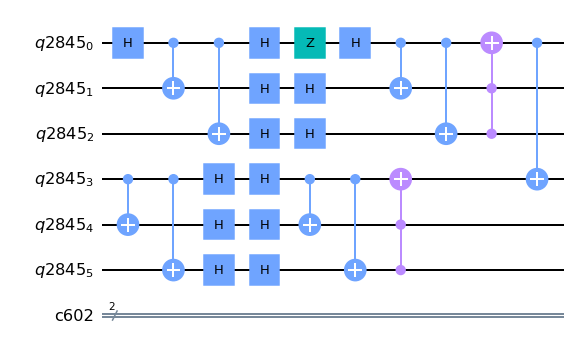

In [12]:
# For each qubit, 2 extra ancilliary qubits are used, hence totally 6 qubits are required
# let us suppose that we want to transmit q[0] and q[3], hence q[0] and q[3] are main qubits
# And q[1] and q[2] are ancilliary qubits for q[0]
# And q[4] and q[5] are ancilliary qubits for q[3]
q= QuantumRegister(6)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

qc.h(q[0])

# Encoding the qubits so that they both bitflip and signflip code can be applied while correction
main_qubits = [0,3]
for i in main_qubits:
    qc.cx(q[i], q[i+1])
    qc.cx(q[i], q[i+2])
    qc.h(q[i])
    qc.h(q[i+1])
    qc.h(q[i+2])
    
# # # Let the error gates act
if chance(0.4):
    if randrange(2) == 0:
        qc.x(q[0])
        print('X Error gate acts on 1st main qubit')
    else:
        qc.z(q[0])
        print('Z Error gate acts on 1st main qubit')
        
    
if chance(0.4):
    if randrange(2) == 0:
        qc.x(q[3])
        print('X Error gate acts on 2nd main qubit')
    else:
        qc.z(q[3])
        print('Z Error gate acts on 2nd main qubit')
    

    
# Applying the error correction
for i in main_qubits:
    qc.h(q[i])
    qc.h(q[i+1])
    qc.h(q[i+2])
    qc.cx(q[i], q[i+1])
    qc.cx(q[i], q[i+2])
    qc.ccx(q[i+2], q[i+1], q[i])


qc.cx(q[0], q[3])

qc.draw(output='mpl')

In [13]:
# Verifying by measuing
# The output has to be |00> + |11> / root(2) as the correction has been applied
qc.measure([0,3],c)

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)
print(counts)

{'00': 478, '11': 522}


In [14]:
# checking 100 times
# Each time should result in |00> + |11>/root(2)

n1 = 0 # Number of times we obtain |00> + |11>/root(2), should be 100 as error correction is applied
n2 = 0 # Number of times any other result is obtained, should be 0 
for r in range(100):
    print('{} iteration'.format(r))
    q = QuantumRegister(6)
    c = ClassicalRegister(2)
    qc = QuantumCircuit(q,c)
    qc.h(q[0])
    
    main_qubits = [0,3]
    for i in main_qubits:
        qc.cx(q[i], q[i+1])
        qc.cx(q[i], q[i+2])
        qc.h(q[i])
        qc.h(q[i+1])
        qc.h(q[i+2])
    
    # Error Gates in action
    for i in [0,1]:
        if chance(0.4):
            if randrange(2) == 0:
                qc.x(q[i])
                print('X Error gate acts on {} qubit'.format(i))
            else:
                qc.z(q[i])
                print('Z Error gate acts on {} qubit'.format(i))
    
    # Applying the error correction
    for i in main_qubits:
        qc.h(q[i])
        qc.h(q[i+1])
        qc.h(q[i+2])
        qc.cx(q[i], q[i+1])
        qc.cx(q[i], q[i+2])
        qc.ccx(q[i+2], q[i+1], q[i])
    
    qc.cx(q[0], q[1])
    qc.measure([0,3],c)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
    counts = job.result().get_counts(qc)
    print(counts.get('00') )
    if counts.get('00') != None:
        n1 += 1
    else:
        n2 += 1

print('Number of times |00> +/- |11>/root(2) ', n1)
print('Number of times any other result ', n2)
# We see that everytime we get the expected bell state as error has been corrected

0 iteration
Z Error gate acts on 0 qubit
X Error gate acts on 1 qubit
512
1 iteration
512
2 iteration
498
3 iteration
468
4 iteration
537
5 iteration
X Error gate acts on 0 qubit
465
6 iteration
X Error gate acts on 0 qubit
513
7 iteration
X Error gate acts on 1 qubit
497
8 iteration
494
9 iteration
X Error gate acts on 0 qubit
524
10 iteration
488
11 iteration
X Error gate acts on 1 qubit
498
12 iteration
Z Error gate acts on 0 qubit
495
13 iteration
Z Error gate acts on 1 qubit
466
14 iteration
Z Error gate acts on 0 qubit
490
15 iteration
Z Error gate acts on 0 qubit
506
16 iteration
Z Error gate acts on 0 qubit
489
17 iteration
482
18 iteration
509
19 iteration
Z Error gate acts on 1 qubit
487
20 iteration
485
21 iteration
514
22 iteration
507
23 iteration
X Error gate acts on 0 qubit
Z Error gate acts on 1 qubit
502
24 iteration
531
25 iteration
479
26 iteration
X Error gate acts on 0 qubit
501
27 iteration
494
28 iteration
X Error gate acts on 0 qubit
X Error gate acts on 1 qubit

**Extending Task 2.3 by applying error gates for ancillary qubits too**

X Error gate acts on 0 main qubit
Z Error gate acts on 1 main qubit
X Error gate acts on 2 main qubit
X Error gate acts on 5 main qubit


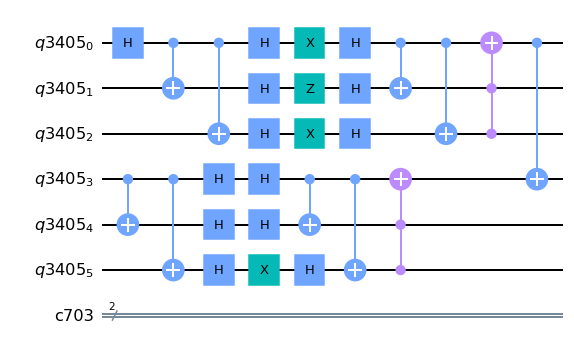

In [15]:
# For each qubit, 2 extra ancilliary qubits are used, 6 qubits are required
# let us suppose that we want to transmit q[0] and q[3], hence q[0] and q[3] are main qubits
# And q[1] and q[2] are ancilliary qubits for q[0]
# And q[4] and q[5] are ancilliary qubits for q[3]
q= QuantumRegister(6)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

qc.h(q[0])

# # # Before error gate acts(transmission occurs) lets encode the qubits
# # # Encoding algorithm is apply CNOT to both ancilliary bits with main qubit as control qubit
main_qubits = [0,3]
for i in main_qubits:
    qc.cx(q[i], q[i+1])
    qc.cx(q[i], q[i+2])
    qc.h(q[i])
    qc.h(q[i+1])
    qc.h(q[i+2])

# # # Let the error gates act
for i in range(6):
    if chance(0.4):
        if randrange(2) == 0:
            qc.x(q[i])
            print('X Error gate acts on {} main qubit'.format(i))
        else:
            qc.z(q[i])
            print('Z Error gate acts on {} main qubit'.format(i))

    
# # # apply bitflip algo
# # # 1. Applying CNOT to the ancilliary qubits with main qubit as control bit 
# # # 2. Applying Toffoli gate to the main qubit with ancilliary qubits
# # # Steps 1 and 2 for the 1st main qubit and 2nd main qubits
main_qubits_indices = [0,3]
for i in main_qubits:
    qc.h(q[i])
    qc.h(q[i+1])
    qc.h(q[i+2])
    qc.cx(q[i], q[i+1])
    qc.cx(q[i], q[i+2])
    qc.ccx(q[i+2], q[i+1], q[i])


qc.cx(q[0], q[3])

qc.draw(output='mpl')

In [16]:
# Explanation in THIS PDF MENTIONED
# Verifying by measuing
# The output has to be |00> + |11> / root(2) as the correction has been applied provided not more than one qubit flips for each qubit
# Problematic cases:- 
# - 

qc.measure([0,3],c)

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)
print(counts)

{'00': 493, '11': 507}


In [17]:
n1 = 0 # number of times we get |00> +/- |11>/root(2), should be around 896 times out of 1000
n2 = 0 # number of times we get |01> +/- |10>/root(2), should be around 104 times out of 1000

for r in range(1000):
    print('Iteration {}'.format(r))
    q= QuantumRegister(6)
    c = ClassicalRegister(2)
    qc = QuantumCircuit(q,c)
    
    qc.h(q[0])
    
    main_qubits = [0,3]
    for i in main_qubits:
        qc.cx(q[i], q[i+1])
        qc.cx(q[i], q[i+2])
        qc.h(q[i])
        qc.h(q[i+1])
        qc.h(q[i+2])

    for i in range(6):
        if chance(0.4):
            if randrange(2) == 0:
                qc.x(q[i])
                print('X Error gate acts on {} main qubit'.format(i))
            else:
                qc.z(q[i])
                print('Z Error gate acts on {} main qubit'.format(i))
    
    main_qubits_indices = [0,3]
    for i in main_qubits:
        qc.h(q[i])
        qc.h(q[i+1])
        qc.h(q[i+2])
        qc.cx(q[i], q[i+1])
        qc.cx(q[i], q[i+2])
        qc.ccx(q[i+2], q[i+1], q[i])

    qc.cx(q[0], q[3])
    
    qc.measure([0,3],c)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
    counts = job.result().get_counts(qc)
    if counts.get('00') != None:
        n1 += 1
    else:
        n2 += 1
    
print('number of times we get |00> +/- |11>/root(2)', n1)
print('number of times we get |01> +/- |10>/root(2)', n2)


Iteration 0
X Error gate acts on 0 main qubit
X Error gate acts on 1 main qubit
Z Error gate acts on 3 main qubit
Iteration 1
Iteration 2
Z Error gate acts on 1 main qubit
Z Error gate acts on 2 main qubit
Z Error gate acts on 3 main qubit
Iteration 3
Z Error gate acts on 0 main qubit
X Error gate acts on 1 main qubit
Z Error gate acts on 2 main qubit
Iteration 4
Iteration 5
X Error gate acts on 4 main qubit
Iteration 6
X Error gate acts on 0 main qubit
X Error gate acts on 5 main qubit
Iteration 7
X Error gate acts on 4 main qubit
Iteration 8
Z Error gate acts on 0 main qubit
Z Error gate acts on 2 main qubit
Iteration 9
X Error gate acts on 2 main qubit
Z Error gate acts on 5 main qubit
Iteration 10
X Error gate acts on 0 main qubit
Z Error gate acts on 2 main qubit
X Error gate acts on 3 main qubit
Z Error gate acts on 4 main qubit
Iteration 11
Z Error gate acts on 0 main qubit
Z Error gate acts on 2 main qubit
X Error gate acts on 5 main qubit
Iteration 12
Z Error gate acts on 0 ma

Iteration 97
X Error gate acts on 1 main qubit
Z Error gate acts on 4 main qubit
Iteration 98
X Error gate acts on 1 main qubit
Iteration 99
Iteration 100
X Error gate acts on 0 main qubit
Z Error gate acts on 2 main qubit
Iteration 101
Z Error gate acts on 0 main qubit
X Error gate acts on 2 main qubit
Z Error gate acts on 4 main qubit
Iteration 102
Z Error gate acts on 3 main qubit
X Error gate acts on 4 main qubit
Iteration 103
X Error gate acts on 0 main qubit
Z Error gate acts on 1 main qubit
X Error gate acts on 2 main qubit
X Error gate acts on 3 main qubit
X Error gate acts on 4 main qubit
Iteration 104
Z Error gate acts on 2 main qubit
X Error gate acts on 3 main qubit
Z Error gate acts on 4 main qubit
Iteration 105
Z Error gate acts on 0 main qubit
Z Error gate acts on 4 main qubit
Iteration 106
X Error gate acts on 0 main qubit
X Error gate acts on 3 main qubit
Iteration 107
Iteration 108
X Error gate acts on 0 main qubit
X Error gate acts on 1 main qubit
X Error gate acts o

Iteration 186
X Error gate acts on 0 main qubit
Z Error gate acts on 1 main qubit
Z Error gate acts on 2 main qubit
Z Error gate acts on 3 main qubit
Z Error gate acts on 5 main qubit
Iteration 187
X Error gate acts on 0 main qubit
Z Error gate acts on 1 main qubit
X Error gate acts on 2 main qubit
Z Error gate acts on 4 main qubit
X Error gate acts on 5 main qubit
Iteration 188
Iteration 189
Z Error gate acts on 5 main qubit
Iteration 190
Z Error gate acts on 2 main qubit
Iteration 191
X Error gate acts on 3 main qubit
X Error gate acts on 5 main qubit
Iteration 192
Z Error gate acts on 4 main qubit
X Error gate acts on 5 main qubit
Iteration 193
X Error gate acts on 2 main qubit
Iteration 194
X Error gate acts on 0 main qubit
X Error gate acts on 4 main qubit
Iteration 195
X Error gate acts on 1 main qubit
Z Error gate acts on 4 main qubit
Iteration 196
Z Error gate acts on 1 main qubit
X Error gate acts on 4 main qubit
Iteration 197
X Error gate acts on 2 main qubit
Z Error gate act

Iteration 273
Z Error gate acts on 0 main qubit
X Error gate acts on 2 main qubit
X Error gate acts on 5 main qubit
Iteration 274
Z Error gate acts on 0 main qubit
Z Error gate acts on 1 main qubit
Z Error gate acts on 3 main qubit
X Error gate acts on 5 main qubit
Iteration 275
Z Error gate acts on 0 main qubit
X Error gate acts on 4 main qubit
Iteration 276
X Error gate acts on 3 main qubit
X Error gate acts on 4 main qubit
Z Error gate acts on 5 main qubit
Iteration 277
X Error gate acts on 0 main qubit
X Error gate acts on 5 main qubit
Iteration 278
Z Error gate acts on 1 main qubit
X Error gate acts on 5 main qubit
Iteration 279
X Error gate acts on 2 main qubit
X Error gate acts on 3 main qubit
Z Error gate acts on 4 main qubit
Z Error gate acts on 5 main qubit
Iteration 280
Z Error gate acts on 0 main qubit
Z Error gate acts on 1 main qubit
Z Error gate acts on 2 main qubit
X Error gate acts on 3 main qubit
Iteration 281
Z Error gate acts on 0 main qubit
X Error gate acts on 1 m

Iteration 358
Z Error gate acts on 2 main qubit
Z Error gate acts on 3 main qubit
Iteration 359
X Error gate acts on 3 main qubit
Z Error gate acts on 4 main qubit
X Error gate acts on 5 main qubit
Iteration 360
Z Error gate acts on 0 main qubit
X Error gate acts on 2 main qubit
Z Error gate acts on 3 main qubit
Z Error gate acts on 4 main qubit
Iteration 361
Z Error gate acts on 0 main qubit
X Error gate acts on 1 main qubit
Z Error gate acts on 4 main qubit
Z Error gate acts on 5 main qubit
Iteration 362
X Error gate acts on 0 main qubit
X Error gate acts on 2 main qubit
X Error gate acts on 3 main qubit
X Error gate acts on 4 main qubit
Iteration 363
X Error gate acts on 0 main qubit
X Error gate acts on 4 main qubit
X Error gate acts on 5 main qubit
Iteration 364
X Error gate acts on 2 main qubit
Z Error gate acts on 3 main qubit
Iteration 365
Z Error gate acts on 0 main qubit
Z Error gate acts on 2 main qubit
Iteration 366
X Error gate acts on 1 main qubit
X Error gate acts on 2 m

Iteration 448
X Error gate acts on 0 main qubit
Z Error gate acts on 5 main qubit
Iteration 449
X Error gate acts on 1 main qubit
Iteration 450
X Error gate acts on 0 main qubit
Z Error gate acts on 2 main qubit
X Error gate acts on 3 main qubit
Z Error gate acts on 4 main qubit
Iteration 451
Z Error gate acts on 1 main qubit
X Error gate acts on 4 main qubit
Iteration 452
X Error gate acts on 1 main qubit
X Error gate acts on 5 main qubit
Iteration 453
Iteration 454
Z Error gate acts on 0 main qubit
Z Error gate acts on 5 main qubit
Iteration 455
Z Error gate acts on 0 main qubit
X Error gate acts on 1 main qubit
X Error gate acts on 2 main qubit
Iteration 456
X Error gate acts on 1 main qubit
Z Error gate acts on 2 main qubit
Iteration 457
Z Error gate acts on 0 main qubit
X Error gate acts on 1 main qubit
X Error gate acts on 5 main qubit
Iteration 458
Z Error gate acts on 1 main qubit
X Error gate acts on 2 main qubit
X Error gate acts on 3 main qubit
X Error gate acts on 4 main qu

Iteration 531
Z Error gate acts on 3 main qubit
Z Error gate acts on 4 main qubit
X Error gate acts on 5 main qubit
Iteration 532
Z Error gate acts on 1 main qubit
Iteration 533
Z Error gate acts on 2 main qubit
X Error gate acts on 4 main qubit
Iteration 534
X Error gate acts on 5 main qubit
Iteration 535
Z Error gate acts on 2 main qubit
X Error gate acts on 3 main qubit
Z Error gate acts on 5 main qubit
Iteration 536
X Error gate acts on 2 main qubit
Z Error gate acts on 3 main qubit
X Error gate acts on 4 main qubit
X Error gate acts on 5 main qubit
Iteration 537
X Error gate acts on 0 main qubit
Z Error gate acts on 2 main qubit
Z Error gate acts on 3 main qubit
Iteration 538
Z Error gate acts on 0 main qubit
X Error gate acts on 2 main qubit
Z Error gate acts on 3 main qubit
X Error gate acts on 4 main qubit
X Error gate acts on 5 main qubit
Iteration 539
X Error gate acts on 2 main qubit
X Error gate acts on 3 main qubit
X Error gate acts on 4 main qubit
Iteration 540
Z Error ga

Iteration 619
Z Error gate acts on 0 main qubit
Z Error gate acts on 2 main qubit
X Error gate acts on 5 main qubit
Iteration 620
Z Error gate acts on 0 main qubit
Iteration 621
X Error gate acts on 0 main qubit
Z Error gate acts on 1 main qubit
X Error gate acts on 4 main qubit
Iteration 622
Z Error gate acts on 1 main qubit
X Error gate acts on 2 main qubit
X Error gate acts on 3 main qubit
Iteration 623
X Error gate acts on 3 main qubit
Z Error gate acts on 4 main qubit
Iteration 624
X Error gate acts on 0 main qubit
Z Error gate acts on 1 main qubit
X Error gate acts on 3 main qubit
Iteration 625
Z Error gate acts on 0 main qubit
X Error gate acts on 1 main qubit
X Error gate acts on 5 main qubit
Iteration 626
Z Error gate acts on 1 main qubit
X Error gate acts on 2 main qubit
X Error gate acts on 3 main qubit
Z Error gate acts on 4 main qubit
Z Error gate acts on 5 main qubit
Iteration 627
X Error gate acts on 0 main qubit
Z Error gate acts on 1 main qubit
Iteration 628
Z Error ga

Iteration 714
Z Error gate acts on 4 main qubit
X Error gate acts on 5 main qubit
Iteration 715
X Error gate acts on 1 main qubit
X Error gate acts on 4 main qubit
Iteration 716
Z Error gate acts on 2 main qubit
Iteration 717
X Error gate acts on 0 main qubit
Z Error gate acts on 1 main qubit
Z Error gate acts on 2 main qubit
Z Error gate acts on 4 main qubit
Iteration 718
X Error gate acts on 0 main qubit
Z Error gate acts on 2 main qubit
Iteration 719
Z Error gate acts on 3 main qubit
Z Error gate acts on 4 main qubit
X Error gate acts on 5 main qubit
Iteration 720
X Error gate acts on 3 main qubit
Iteration 721
Z Error gate acts on 1 main qubit
X Error gate acts on 2 main qubit
X Error gate acts on 3 main qubit
Z Error gate acts on 4 main qubit
Z Error gate acts on 5 main qubit
Iteration 722
Z Error gate acts on 0 main qubit
Z Error gate acts on 1 main qubit
Z Error gate acts on 2 main qubit
Iteration 723
Z Error gate acts on 2 main qubit
X Error gate acts on 3 main qubit
Iteration 

Iteration 815
X Error gate acts on 2 main qubit
Z Error gate acts on 5 main qubit
Iteration 816
Z Error gate acts on 2 main qubit
X Error gate acts on 4 main qubit
Iteration 817
X Error gate acts on 0 main qubit
X Error gate acts on 2 main qubit
X Error gate acts on 3 main qubit
Z Error gate acts on 4 main qubit
Z Error gate acts on 5 main qubit
Iteration 818
X Error gate acts on 1 main qubit
X Error gate acts on 4 main qubit
X Error gate acts on 5 main qubit
Iteration 819
Z Error gate acts on 1 main qubit
Iteration 820
X Error gate acts on 0 main qubit
Iteration 821
Z Error gate acts on 1 main qubit
Z Error gate acts on 3 main qubit
Z Error gate acts on 4 main qubit
Iteration 822
Iteration 823
X Error gate acts on 3 main qubit
Z Error gate acts on 4 main qubit
X Error gate acts on 5 main qubit
Iteration 824
Z Error gate acts on 0 main qubit
Z Error gate acts on 2 main qubit
Z Error gate acts on 4 main qubit
X Error gate acts on 5 main qubit
Iteration 825
X Error gate acts on 0 main qu

Iteration 909
Z Error gate acts on 1 main qubit
X Error gate acts on 2 main qubit
X Error gate acts on 3 main qubit
X Error gate acts on 5 main qubit
Iteration 910
Z Error gate acts on 0 main qubit
X Error gate acts on 1 main qubit
Z Error gate acts on 5 main qubit
Iteration 911
Z Error gate acts on 0 main qubit
Z Error gate acts on 3 main qubit
Iteration 912
X Error gate acts on 0 main qubit
Z Error gate acts on 1 main qubit
Z Error gate acts on 2 main qubit
X Error gate acts on 4 main qubit
Iteration 913
Z Error gate acts on 0 main qubit
Z Error gate acts on 1 main qubit
X Error gate acts on 4 main qubit
Iteration 914
X Error gate acts on 0 main qubit
Z Error gate acts on 1 main qubit
X Error gate acts on 3 main qubit
Iteration 915
Z Error gate acts on 1 main qubit
X Error gate acts on 2 main qubit
Iteration 916
Z Error gate acts on 1 main qubit
X Error gate acts on 2 main qubit
X Error gate acts on 3 main qubit
X Error gate acts on 5 main qubit
Iteration 917
Z Error gate acts on 0 m